# Mount GDrive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Read data

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/Machine Learning (CS7CS4)/Group Project/tcd-ml-1920-group-income-train.csv")
#df_test = pd.read_csv("/content/drive/My Drive/Machine Learning (CS7CS4)/Group Project/tcd-ml-1920-group-income-test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preprocess data

In [0]:
# Data preprocessing
rename_cols = {
    "Instance": "i",
    "Year of Record": "year",
    "Housing Situation": "house",
    "Crime Level in the City of Employement": "crime",
    "Work Experience in Current Job [years]": "exp",
    "Satisfation with employer": "happy",
    "Gender": "gender",
    "Age": "age",
    "Country": "country",
    "Size of City": "city_size",
    "Profession": "profession",
    "University Degree": "degree",
    "Wears Glasses": "glasses",
    "Hair Color": "hair",
    "Body Height [cm]": "height",
    "Yearly Income in addition to Salary (e.g. Rental Income)": "income_extra",
    "Total Yearly Income [EUR]": "income",
}
preprocessed = data.rename(columns=rename_cols)
preprocessed = preprocessed.drop("i", 1)
# convert columns to numeric values
# special case: extra income: strip trailing EUR
preprocessed['income_extra'] = preprocessed['income_extra'].str.strip(' EUR')
numeric_cols = ['year', 'crime', 'exp', 'age', 'city_size', 'glasses', 'height', 'income_extra']
for c in numeric_cols:
    #print("converting column {0} to numeric".format(c))
    series = preprocessed[c]
    preprocessed[c] = pd.to_numeric(series, errors='coerce')

# replace unknown values in categorical data
cat_replace = {
    'happy': [np.nan],
    'degree': [np.nan],
    'hair': [np.nan],
    'gender': [np.nan],
    'profession': [np.nan],
}
for key, vals in cat_replace.items():
    preprocessed[key].replace(vals, 'unknown', inplace=True)

# finally, drop some numeric NA values
dropna_cols = ['year', 'exp']
preprocessed.dropna(subset=dropna_cols, inplace=True)

#preprocessed.isnull().sum()
preprocessed.sample(20)


year             house  crime  ...  height income_extra     income
988606   2015.0  Medium Apartment     19  ...     186         0.00  836397.47
747174   1995.0       Small House    115  ...     159         0.00   74682.80
455154   1976.0       Large House    124  ...     174         0.00   28040.91
1004446  2016.0  Medium Apartment     46  ...     194         0.00  116149.12
213198   1957.0                nA     90  ...     151     32860.09   38504.77
33757    1942.0                 0     94  ...     171    100375.96  101530.01
604487   1984.0      Medium House     82  ...     181         0.00   58889.14
838050   2003.0       Small House     93  ...     209         0.00   82454.08
782416   1998.0       Small House     53  ...     180         0.00   93011.72
733507   1994.0       Small House    118  ...     165     71860.65   87492.68
782856   1998.0       Small House    142  ...     206         0.00   43497.17
623692   1985.0      Medium House     46  ...     191         0.00   40449.17
651066   1988.0      Medium House    154  ...     195         0.00   94489.89
262531   1961.0            Castle     94  ...     154         0.00     140.43
599539   1983.0      Medium House    115  ...     164         0.00    9672.24
662083   1989.0       Small House     15  ...     218         0.00   43290.74
129839   1950.0                 0     68  ...     168         0.00    9481.65
543592   1980.0       Large House    117  ...     150         0.00    9798.50
461338   1977.0       Large House    125  ...     169         0.00   11537.18
662923   1989.0      Medium House     57  ...     145         0.00   39935.51

[20 rows x 16 columns]

# Correlation matrix for numeric types
 - medium-high: year + income
 - low: exp + income
 - low: age + income
 - low: income_extra + income

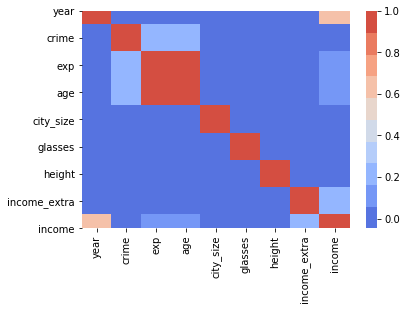

In [0]:
import seaborn as sns
corr = preprocessed.select_dtypes(include=['bool', 'float64', 'int']).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('coolwarm', 10))

# Boxplots for categorical data
- House is a good predictor of income
- Country is a good predictor of income
- Degree is not a significant predictor of income
- Happiness: slight relation between having a higher income and being unhappy
- Gender: 'f' (not female) shows higher average income, male higher overall
- Hair is not a significant predictor of income

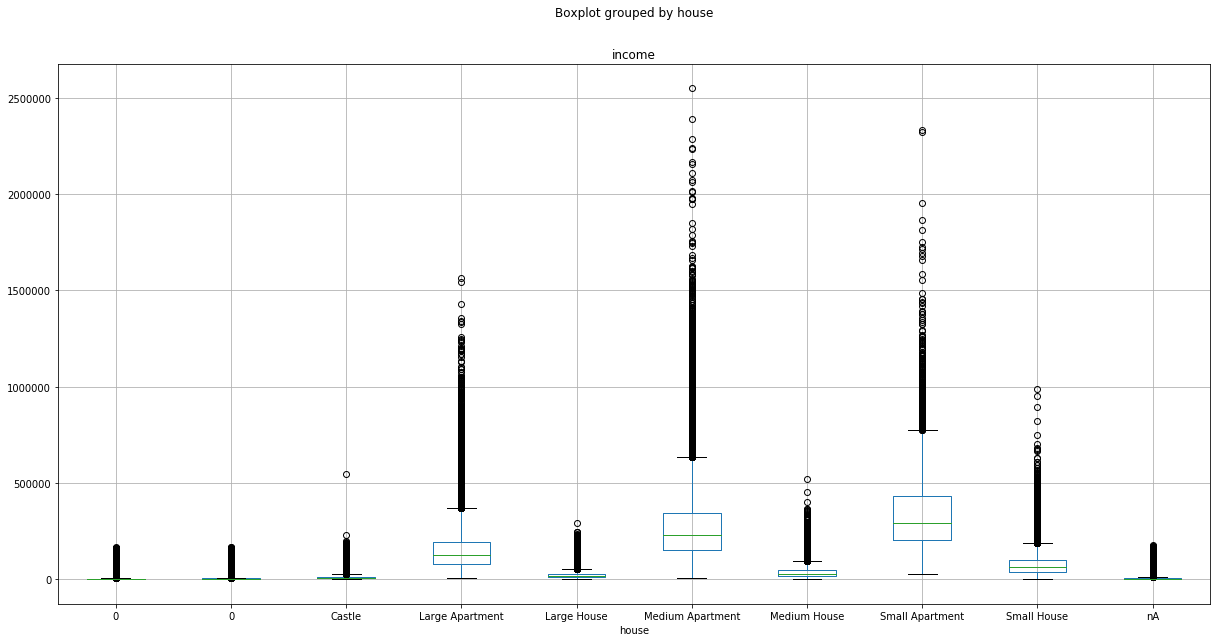

In [0]:
preprocessed.boxplot(by='house', column=['income'], figsize=(20, 10))

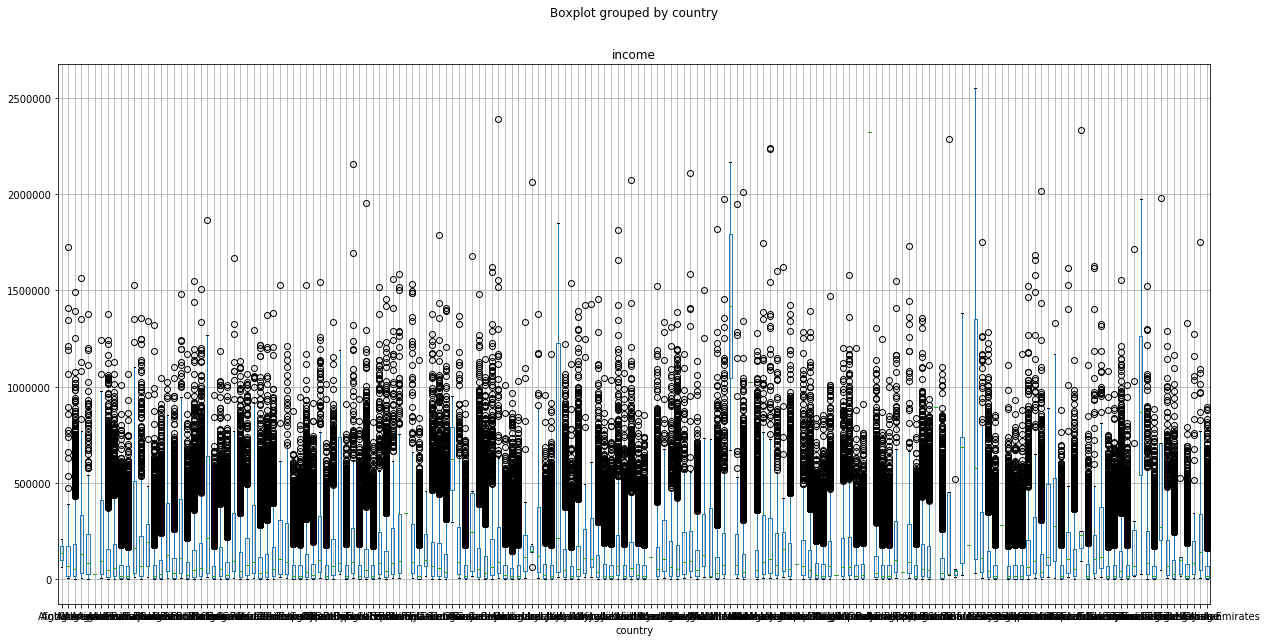

In [0]:
preprocessed.boxplot(by='country', column=['income'], figsize=(20, 10))

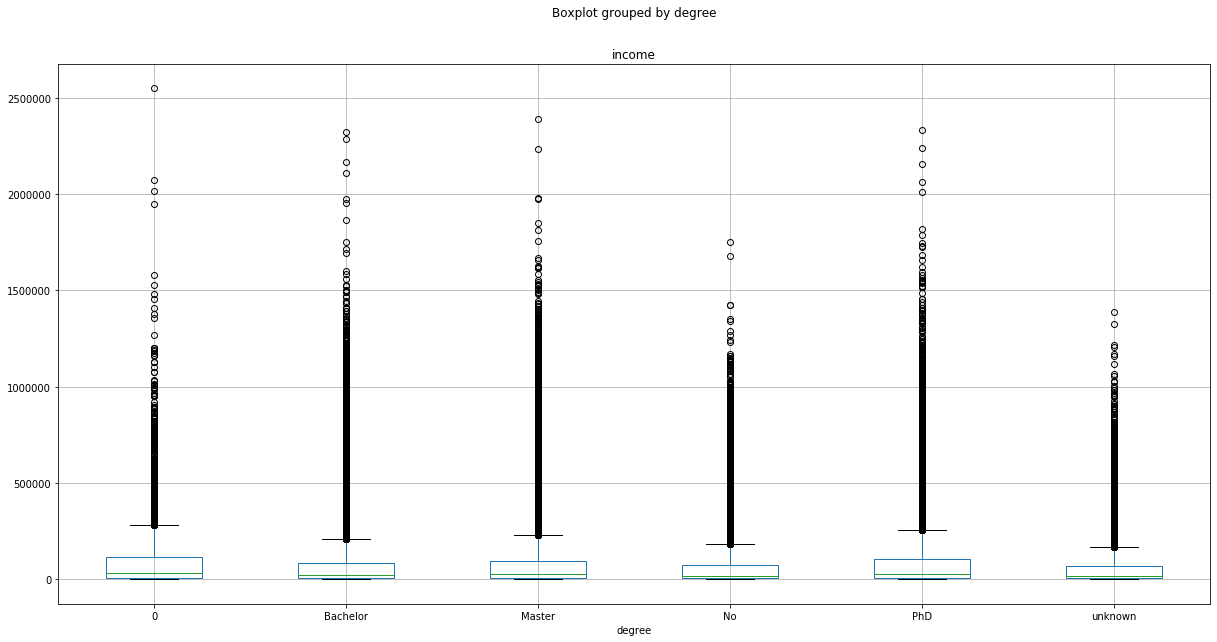

In [0]:
preprocessed.boxplot(by='degree', column=['income'], figsize=(20, 10))

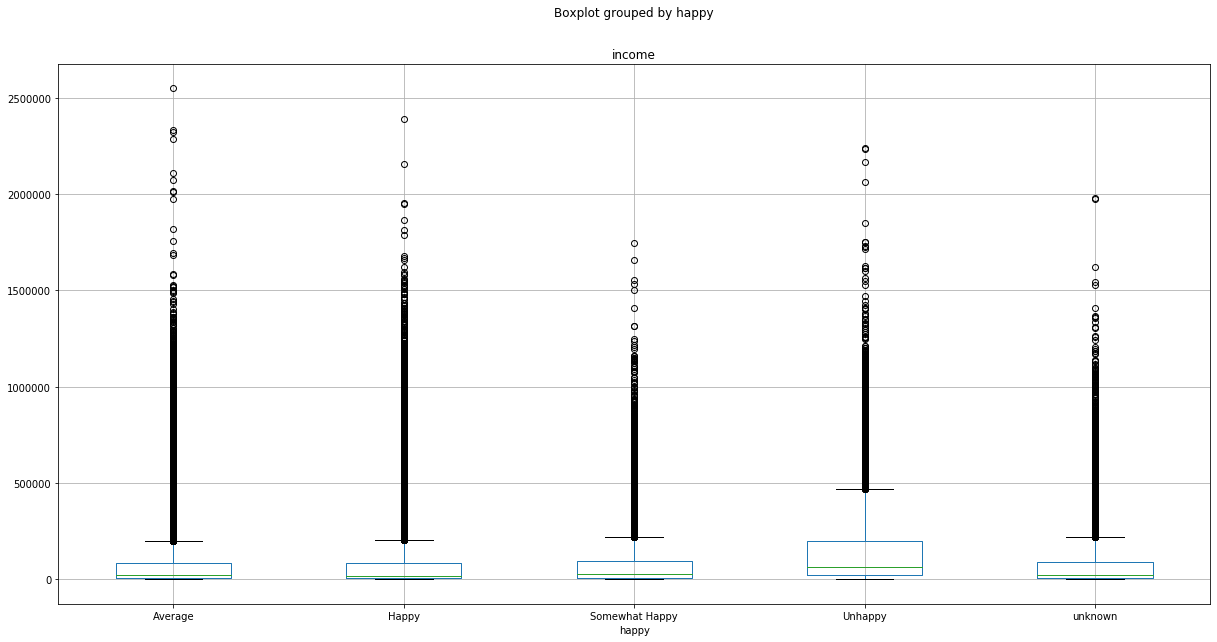

In [0]:
preprocessed.boxplot(by='happy', column=['income'], figsize=(20, 10))

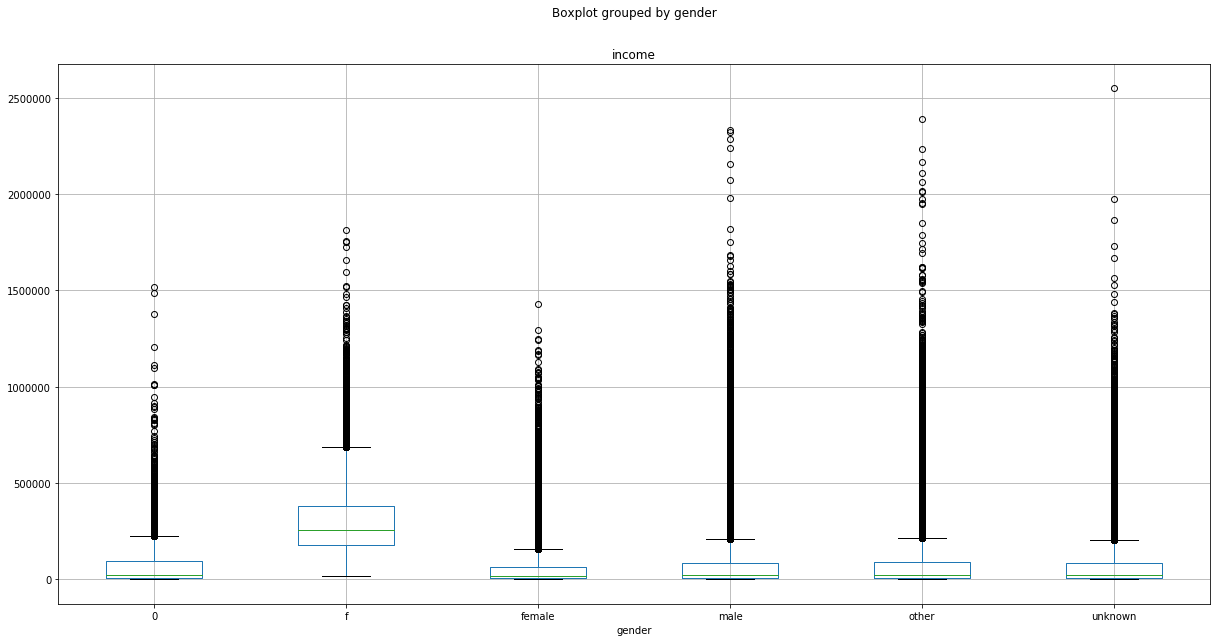

In [0]:
preprocessed.boxplot(by='gender', column=['income'], figsize=(20, 10))

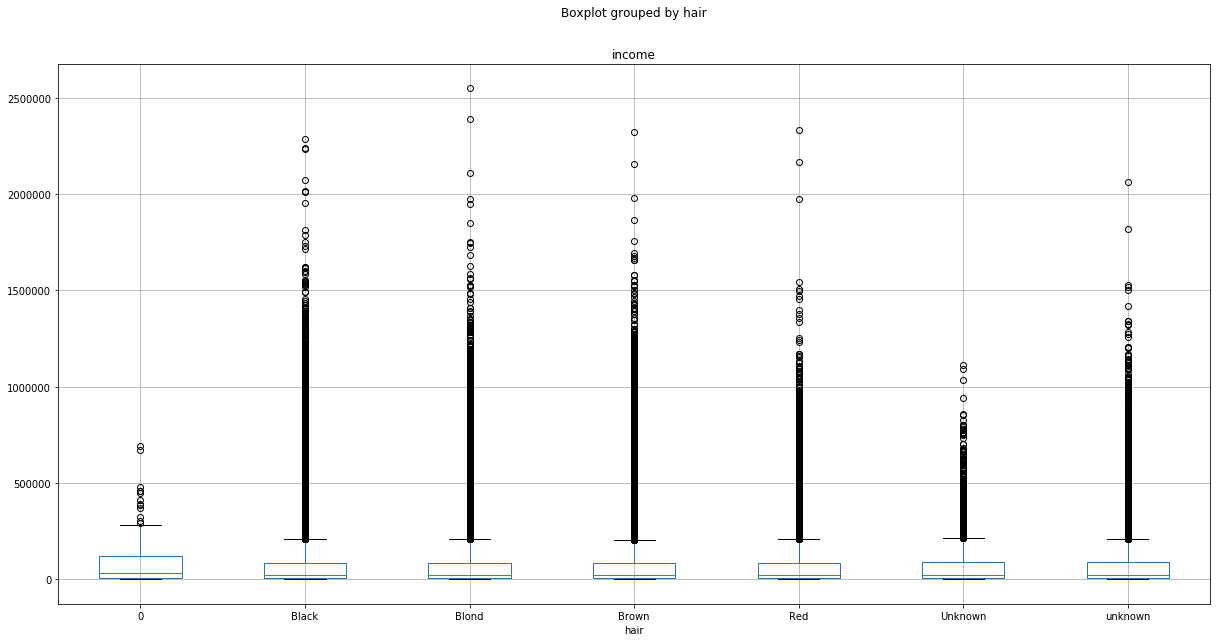

In [0]:
preprocessed.boxplot(by='hair', column=['income'], figsize=(20, 10))